Loan Prediction

In [73]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Training

In [4]:
#reading training dataframe
train = pd.read_csv("train_data.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.shape

(614, 13)

EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
#Finding null values
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train.isna().sum().sum()

149

In [10]:
#Dropping Index Column
train.drop("Loan_ID", axis = 1, inplace = True)

In [37]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [38]:
#to fill null values with forward filling
t1=train.fillna(method='pad') 

In [42]:
t1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
#bfill done to remove null value in LoanAmount
t1=train.fillna(method='bfill')

In [43]:
#encoding categorical columns
train_encoded = pd.get_dummies(t1, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])

In [44]:
train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,Y,1,0,0,0,...,0,1,0,1,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0


In [48]:
#Assigning Target and Predictors
x = train_encoded.drop("Loan_Status", axis = 1)
y = train_encoded["Loan_Status"]

In [51]:
x.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1


In [52]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [54]:
y.replace("N", "0", inplace = True)
y.replace("Y", "1", inplace = True)
y = y.astype(int)

In [55]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [56]:
#Train test split for training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
#using Logistic regression
model1 = LogisticRegression() 
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)
accuracy_score(predictions1, y_test)

0.7886178861788617

In [123]:
print(predictions1)

[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 0]


In [66]:
#using kNN
metric_k=[]
neighbors=np.arange(3,25)

for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model=classifier.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

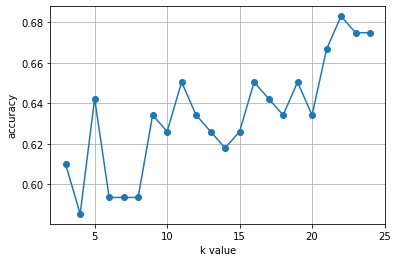

In [68]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [69]:
# kNN tested from 3 to 25,highest at 22
model2 = KNeighborsClassifier(22)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)
accuracy_score(predictions2, y_test)

0.6829268292682927

In [71]:
#using SVM model
model3=SVC(kernel='linear') 
model3.fit(x_train,y_train)
predictions3=model3.predict(x_test)
accuracy_score(predictions3, y_test)

0.7886178861788617

In [72]:
#using Decision Tree model
model4 = DecisionTreeClassifier() 
model4.fit(x_train, y_train)
predictions4 = model4.predict(x_test)
accuracy_score(predictions4, y_test)

0.6016260162601627

In [74]:
#using Random Forest
model5 = RandomForestClassifier() # testing for RandomForestClassifier
model5.fit(x_train, y_train)
predictions5 = model5.predict(x_test)
accuracy_score(predictions5, y_test)

0.7642276422764228

Testing

In [94]:
#reading testing dataframe
test = pd.read_csv("test_data.csv")

In [95]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [96]:
test.shape

(367, 12)

EDA

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [98]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [99]:
#Finding null values
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [100]:
ID = test["Loan_ID"]

In [102]:
#dropping Index
test.drop("Loan_ID", axis = 1, inplace = True)

In [103]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [104]:
#to fill null values with forward filling
t2=test.fillna(method='pad') 

In [105]:
t2.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [106]:
test_encoded = pd.get_dummies(t2, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])

In [107]:
test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
3,2340,2546,100.0,360.0,1.0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0


Predictions for the Test data

In [109]:
#Predictions
test_predictions1= model1.predict(test_encoded)
test_predictions1= pd.DataFrame(test_predictions1, columns = ["Loan_Status"])

In [110]:
#Loan status returned to Y/N
test_predictions1["Loan_ID"] = ID
test_predictions1["Loan_Status"].replace(0, "N", inplace = True)
test_predictions1["Loan_Status"].replace(1, "Y", inplace = True)

In [111]:
#Model 1 predictions
final_predictions = test_predictions1[["Loan_ID", "Loan_Status"]]

final_predictions.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [112]:
#Model 2 predictions
test_predictions2= model2.predict(test_encoded)
test_predictions2= pd.DataFrame(test_predictions2, columns = ["Loan_Status"])
test_predictions2["Loan_ID"] = ID
test_predictions2["Loan_Status"].replace(0, "N", inplace = True)
test_predictions2["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions1 = test_predictions2[["Loan_ID", "Loan_Status"]]
#final_predictions.to_csv("./final_submission.csv",index = False)
final_predictions1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [113]:
#Model 3 predictions
test_predictions3= model3.predict(test_encoded)
test_predictions3= pd.DataFrame(test_predictions3, columns = ["Loan_Status"])
test_predictions3["Loan_ID"] = ID
test_predictions3["Loan_Status"].replace(0, "N", inplace = True)
test_predictions3["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions2 = test_predictions3[["Loan_ID", "Loan_Status"]]
#final_predictions.to_csv("./final_submission.csv",index = False)
final_predictions2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [114]:
#Model 4 predictions
test_predictions4= model4.predict(test_encoded)
test_predictions4= pd.DataFrame(test_predictions4, columns = ["Loan_Status"])
test_predictions4["Loan_ID"] = ID
test_predictions4["Loan_Status"].replace(0, "N", inplace = True)
test_predictions4["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions3 = test_predictions4[["Loan_ID", "Loan_Status"]]
#final_predictions.to_csv("./final_submission.csv",index = False)
final_predictions3.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [115]:
#Model 5 predictions
test_predictions5= model4.predict(test_encoded)
test_predictions5= pd.DataFrame(test_predictions4, columns = ["Loan_Status"])
test_predictions5["Loan_ID"] = ID
test_predictions5["Loan_Status"].replace(0, "N", inplace = True)
test_predictions5["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions4 = test_predictions5[["Loan_ID", "Loan_Status"]]
#final_predictions.to_csv("./final_submission.csv",index = False)
final_predictions4.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [128]:
#Model 1 using Logistic Regression seems to be the best model for the given data
final_predictions

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [136]:
#Saving predictions to csv file
final_predictions.to_csv("./final_submission.csv",index = False)